# Club de karate

In [8]:
import math, subprocess
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
import networkx as nx

In [9]:
ruta_del_ejecutable = "../src/tp2.exe"
np.random.seed(10)

In [10]:
def ejecutar_algoritmo_cpp(matrix, cantidad, iteraciones=100000, tolerancia= 1e-4):
    # Generamos la input
    archivo_instancia = "input.txt"
    with open(archivo_instancia, "w+") as f:
        for i in range(matrix.shape[0]):
            f.write(" ".join(matrix[i,:].astype("str")))
            f.write("\n")
    
    # Crear proceso para ejecutar el codigo.
    output_dir = os.getcwd()
    
    process = subprocess.Popen([ruta_del_ejecutable, archivo_instancia, str(cantidad), str(iteraciones), str(tolerancia)], cwd=output_dir)

    # Correr experimento.
    exit_code = process.wait()

    # Verificar que el proceso no fallo.
    if exit_code != 0: raise(Exception(F"Hubo un error en , cantidadla ejecución del el algoritmo."))
    
    # Leemos los archivos de salida
    f = open(archivo_instancia + ".autovalores.out", "r")
    autovalores = []
    for line in f:
        autovalores.append(float(line))
    f2 = open(archivo_instancia + ".autovectores.out", "r")
    autovectores = np.zeros((matrix.shape[0], cantidad))
    i = 0
    for line in f2:
        autovectores[i, :] = [float(current) for current in line.split(" ")]
        i += 1
    return autovalores, autovectores

# Item 2.1
## Centralidad de autovectores

In [11]:
def calcular_centralidad_python(matriz):
    # Calcular autovectores y autovalores
    autovalores, autovectores = np.linalg.eig(matriz)
    # Obtenemos el autovector más grande que define la centralidad
    autovalor_mas_grande_index = 0
    for i in range(len(autovalores)):
        if autovalores[i] > autovalores[autovalor_mas_grande_index]:
            autovalor_mas_grande_index = i
    autovector_mas_grande = autovectores[autovalor_mas_grande_index]
    return autovector_mas_grande

In [12]:
def calcular_centralidad(matriz):
    # como el algoritmo c++ devuelve los autovalores en orden, solo necesitamos el autovector asociado primero (el mas grande)
    aurovalores, autovectores = ejecutar_algoritmo_cpp(matriz, 1, 100000, 1e-7)
    return autovectores[:, 0]

Indice del mejor: 33
Mejor: 0.373407


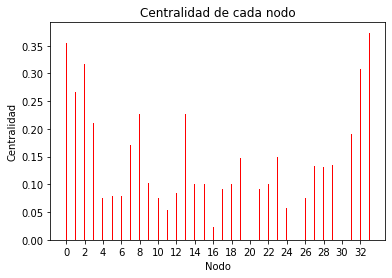

In [13]:
# Levantamos la matriz
f = open("../tests/karateclub_matriz.txt", "r")
i = 0
matriz_karate=0
for line in f:
    if (i == 0):
        size = len(line.split(" "))
        matriz_karate = np.zeros((size, size))
    matriz_karate[i, :] = [float(current) for current in line.split(" ")]
    i += 1
centralidad = calcular_centralidad(matriz_karate)
print("Indice del mejor:", np.argmax(centralidad))
print("Mejor:", np.max(centralidad))
# autovalores, autovectores = metodo_de_la_potencia(matriz_karate)
# print(list(enumerate(sorted(abs(autovalores)))))
# print((matriz_karate==matriz_karate.T).all())
plt.figure(1, figsize=(6, 4))
plt.bar([i for i in range(len(centralidad))], centralidad, color="r", width=.1)
plt.xticks(range(0, len(centralidad), 2))
plt.xlabel("Nodo")
plt.ylabel("Centralidad")
plt.title("Centralidad de cada nodo")

plt.savefig('./graficos/centralidad.png')
plt.show()
plt.close()

# Item 2.2
## Computar todos los autovectores de la matriz Laplaciana de la red del Club de Karate.

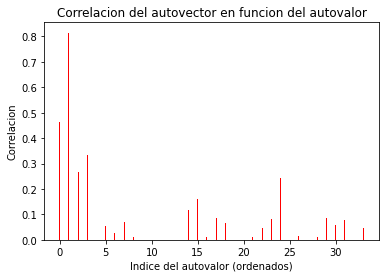

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 0.11213743  0.04128789 -0.02321896  0.05549978  0.28460453  0.32372722
  0.32372722  0.052586   -0.05160128 -0.09280089  0.28460453  0.21099295
  0.1094613   0.01474197 -0.16275078 -0.16275078  0.42276533  0.10018142
 -0.16275078  0.01363713 -0.16275078  0.10018142 -0.16275078 -0.15569457
 -0.15302558 -0.16096292 -0.18710956 -0.12766405 -0.0951523  -0.16765031
 -0.07349964 -0.09875343 -0.13034546 -0.11890326]


In [14]:
#tengo que leer el vector que representa los grupos despues del conflicto
f = open("../tests/karateclub_labels.txt", "r")
vector_que_representa_al_grupo = np.zeros((size))
i=0
for line in f:
    vector_que_representa_al_grupo[i]=(int(line))
    i=i+1

matriz_laplaciana=np.diag(matriz_karate.sum(axis=0)) - matriz_karate

autovalores_laplaciana, autovectores_laplaciana = np.linalg.eig(matriz_laplaciana)
autovectores_laplaciana = autovectores_laplaciana.transpose()
tmp = sorted(zip(autovalores_laplaciana, autovectores_laplaciana), key=lambda x: x[0])
autovalores_laplaciana = [x[0] for x in tmp]
autovectores_laplaciana = [x[1] for x in tmp]
correlaciones = []
for autovector in autovectores_laplaciana:
    correlaciones.append(abs(np.corrcoef(autovector, vector_que_representa_al_grupo)[0,1]))
plt.figure(1, figsize=(6, 4))
plt.bar(np.arange(len(autovalores_laplaciana)), correlaciones, color="r", width=.1)
plt.xlabel("Indice del autovalor (ordenados)")
plt.ylabel("Correlacion")
plt.title("Correlacion del autovector en funcion del autovalor")
plt.savefig('./graficos/correlacion_autovalor.png')
plt.show()
plt.close()
print(vector_que_representa_al_grupo)
print(autovectores_laplaciana[1])

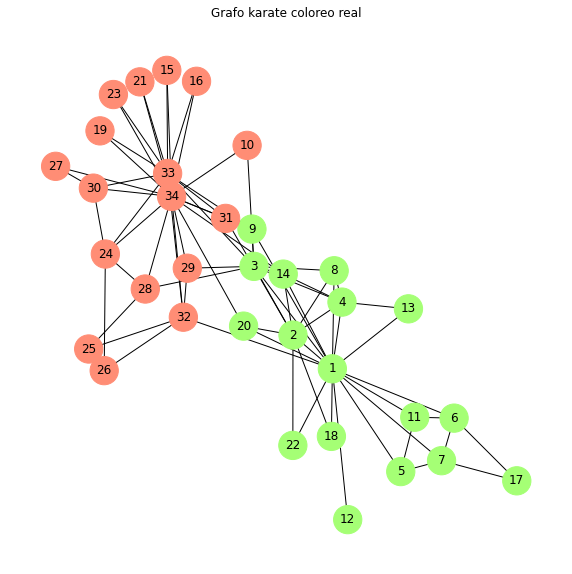

In [15]:
G = nx.Graph()
G.add_nodes_from(range(1, len(matriz_karate) + 1))
for i in range(len(matriz_karate)):
    for j in range(len(matriz_karate)):
        if (matriz_karate[i, j] == 1):
            G.add_edge(i+1, j+1)
colors = ['#ff8d75' if group == 1 else '#a5ff75' for group in vector_que_representa_al_grupo]
plt.figure(2,figsize=(10,10))
ax = plt.gca()
ax.set_title('Grafo karate coloreo real')
nx.draw_networkx(G, node_color=colors, pos=nx.spring_layout(G, seed=10), node_size=800, ax=ax)
_ = ax.axis('off')
plt.savefig('./graficos/grafo-real.png')
plt.show()
plt.close()

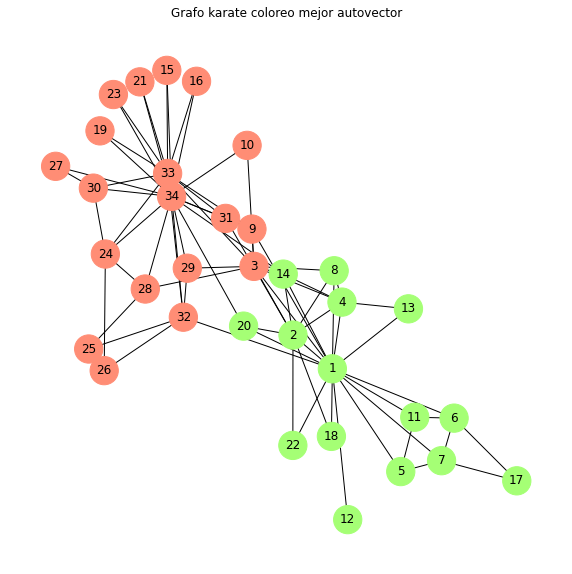

In [16]:
G = nx.Graph()
G.add_nodes_from(range(1, len(matriz_karate) + 1))
for i in range(len(matriz_karate)):
    for j in range(len(matriz_karate)):
        if (matriz_karate[i, j] == 1):
            G.add_edge(i+1, j+1)
colors = ['#ff8d75' if group < 0 else '#a5ff75' for group in autovectores_laplaciana[1]]
plt.figure(2,figsize=(10,10))
ax = plt.gca()
ax.set_title('Grafo karate coloreo mejor autovector')
nx.draw_networkx(G, node_color=colors, pos=nx.spring_layout(G, seed=10), node_size=800, ax=ax)
_ = ax.axis('off')
plt.savefig('./graficos/grafo-estimado.png')
plt.show()
plt.close()